We will build a logistic regression model to classify more than two classes. We will use a data set comprising of images. And build an image classifier.
1. Use a one vs rest classifier
2. Use a cross entropy loss classifier

In [1]:
# data_dir="E:\Work\Machine Learning Course\Python\Module 3 Logistic Regression\Data"

We will be using scikit-learn. In this demo, we will build an image classifier. The data set we will use is a very popular open source data set called mnist data set. This data set contains images of handwritten digits ranging from 0 to 9, so there are in total 10 classes. We will use these images to build a model, that will be able to classify an image into one of the ten digits.

Before we build a model, we first would need to understand how images are stored in a computer and how we can represent these images in a manner suitable to do machine learning. For this simple demo, we will confine our discussion to black and white images.

#### Representing Image Data for ML

<img src="image1.gif">

Images are represented in the form of a matrix of numbers inside the computer. The matrix contains the pixel intensities; pixel intensities range from 0 to 255, a pixel intensity of 0 signifies a black region, while a pixel intensity of 255 signifies a white region in the image. For example, this image can be represented as a matrix where each number in the matrix can lie between 0 to 255 depending upon if that number is representing a dark region in the image or a light region in the image.

#### Flattening an Image Matrix

<img src="flatten.png">

For example, this schematic shows how a digit 1 might be represented as an image. This is how a digit 1 will be perceived by human eye, the numbers here signify the pixel positions, so 1 here represents the first pixel, 2 here represents the second pixel, 3 here represents the third pixel and so on. Now this is the matrix representation of this image, as you can see, these were the light regions and hence, the pixel intensities are 255, while for the pixels at position 2, 5, 8 and 11, we have a pixel intensity of 0.

When we do machine learning, we usually have many images. Now how would a predictor matrix be constructed for all these images? The way we represent each image in our predictor matrix is by flattening the image. This is what flattening an image means. We create a vector out of a matrix. So each vector now contains the pixel intensities that were present in the image matrix. We stack all these images in this way in a single predictor matrix where each row then becomes the vector representation of each image. This is one of the most popular ways of deriving a predictor matrix from images.

In [3]:
import os
import pandas as pd
import numpy as np
# os.chdir(data_dir)
pixel_values=pd.read_csv("mnist_x.csv")
image_labels=pd.read_csv("mnist_y.csv",header=None)
%matplotlib inline

In [4]:
pixel_values.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


This is how the first file looks like. This first file contains the flattened pixel values for each of the images, so we have many images in our data set and each of the images has been fattened. The original images were 8x8 and when we flattened them, we ended up having a single vector of length 64.

In [5]:
image_labels.head()

,0
0,0
1,1
2,2
3,3
4,4


this contains the actual labels of the images, for example the flattened image in the first row is an image of digit 0; the flattened image in the second rows set is an image of digit 1.

Another thing that we will do is we will normalize the values in our predictor matrix. The way we will do that is by dividing each value in this matrix by 255. As you know the values can range between 0 to 255, so if we divide by 255, all the numbers in this matrix will be bounded between 0 and 1.

In [6]:
## Normalizing the pixel values
pixel_values=pixel_values/255.0

In [7]:
X=pixel_values
y=image_labels[0]

In [8]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.20,random_state=200)

Now we have seen logistic regression class earlier in the context of binary classification. If we want to solve a multiclass classification problem using logistic regression, then we can use this parameter called multiclass and give it different values.

Now as discussed previously, there are 2 ways to do multiclass classification, one way is to use a 1 versus all approach or 1 versus rest approach; the other is to use a multinomial classifier or a cross entropy classifier. Now the logistic regression method in scikit-learn supports both these approaches. If we give a value of OVR to this multiclass parameter, we will be building a multiclass classifier using 1 versus rest strategy.

Now as discussed earlier, logistic regression can be regularized, here I will using an L2 penalty. So lets instantiate a classification object.

In [10]:
# import sklearn.linear_model as linear_model
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(multi_class="ovr",penalty="l2",solver="lbfgs")

solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ -- Algorithm to use in the optimization problem. The choice of the algorithm depends on the penalty chosen

After this, I will need to specify the appropriate value for the parameter C which corresponds to the strength of the regularization penalty that I have applied. Now for me to figure out a good value of C, I need to do a grid search, this is what I am doing here, I am doing a simple grid search. I am searching over a grid of numbers ranging between 0.01 to 10 and there are 10 such numbers that I am doing a grid search on, lets run this.

In [17]:
np.random.seed(200)
mod=model_selection.GridSearchCV(clf,param_grid={"C":np.random.uniform(0.01,10,10)})
mod.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': array([9.47684625, 2.27320874, 5.94825724, 4.28880376, 7.64376546,
       0.03857731, 3.58066258, 9.09785191, 4.56624904, 9.81820906])})

In [14]:
mod.best_params_

{'C': 9.818209064491702}

In [19]:
## accuracy score
mod.score(X_test,y_test)

0.9416666666666667

Lets obtain probability predictions from this model for the first row in our test data set.

In [26]:
X_test.iloc[0].values.reshape(1,-1)

array([[0.        , 0.00784314, 0.04705882, 0.05098039, 0.0627451 ,
        0.05882353, 0.00392157, 0.        , 0.        , 0.03137255,
        0.0627451 , 0.05490196, 0.04313725, 0.02745098, 0.        ,
        0.        , 0.        , 0.03137255, 0.0627451 , 0.02745098,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02745098, 0.0627451 , 0.0627451 , 0.04313725, 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.02352941, 0.05882353, 0.03529412, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03529412,
        0.05882353, 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.02745098, 0.0627451 , 0.04313725, 0.        ,
        0.        , 0.        , 0.00392157, 0.0627451 , 0.0627451 ,
        0.05098039, 0.00392157, 0.        , 0.        ]])

reshape(1, -1) if it contains a single sample. We could change our Series into a NumPy array and then reshape it to have two dimensions

In [20]:
mod.predict_proba(X_test.iloc[0].values.reshape(1,-1))

array([[0.01435224, 0.03089049, 0.01674947, 0.11443426, 0.01403317,
        0.69181214, 0.00932715, 0.01196723, 0.05155476, 0.04487909]])

so since there are 10 classes, this will give me probability corresponding to each class or for whichever class the probability is high, I will make the prediction saying that this row belongs to that particular class.

Lets find out which index has the maximum value.

In [21]:
np.argmax(mod.predict_proba(X_test.iloc[0].values.reshape(1,-1)))

5

Lets try to plot the first row in our test data set and see what kind of image it contains. Now if you remember these images are already flattened, so I will need to reshape them and if you remember, my original data set was flattened where each image is represented by a vector of length 64, so if I assume that my image is a square image which has been flattened, then the original image will have a dimension of 8x8. So this is what I am doing here, I am taking the first row in my data set and reshaping it into an 8x8 matrix and plotting it using matplotlib. 

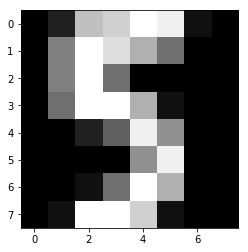

In [27]:
import matplotlib.pyplot as plt
plt.imshow(np.array(X_test.iloc[0]).reshape(8,8),cmap='gray')

As you can see, this seems to be an image of five, a handwritten digit of five and this is what I have predicted, a maximum value was for a class of 5. So my model seems to be doing a good job.

Let’s see, how we can build a cross entropy loss classifier. The only thing that we will need to change is, we will need to change the value that we passed to the multiclass parameter, instead of OVR, we will pass it a value of multinomial.

In [29]:
np.random.seed(200)
clf=linear_model.LogisticRegression(multi_class="multinomial",penalty="l2",solver="lbfgs")
mod1=model_selection.GridSearchCV(clf,param_grid={"C":np.random.uniform(0.01,10,10)})
mod1.fit(X_train,y_train)

C:\Users\VK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': array([9.47684625, 2.27320874, 5.94825724, 4.28880376, 7.64376546,
       0.03857731, 3.58066258, 9.09785191, 4.56624904, 9.81820906])})

In [30]:
mod1.best_params_

{'C': 9.818209064491702}

In [31]:
## accuracy score
mod1.best_score_

0.9290360046457609

In [33]:
## score on test data
mod1.score(X_test,y_test)

0.9472222222222222

In [34]:
mod1.predict_proba(X_test.iloc[0].values.reshape(1,-1))

array([[0.00773295, 0.01586381, 0.00925783, 0.05749544, 0.00751203,
        0.83803796, 0.00549471, 0.00719461, 0.02686031, 0.02455036]])

In [35]:
np.argmax(mod1.predict_proba(X_test.iloc[0].values.reshape(1,-1)))

5

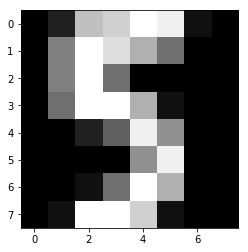

In [36]:
plt.imshow(np.array(X_test.iloc[0]).reshape(8,8),cmap='gray')